## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

# Imágenes de rayos X de pecho para detectar neumonía

In [ ]:
# #librerias necesarias para tratamiento y manejo de datos numéricos.
# ==============================================================================
import numpy as np
import pandas as pd

import os
import requests


#importamos las librerias necesarias para Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg


# Preprocesado y modelado
# keras - tensorflow
# ==============================================================================
from mpl_toolkits.mplot3d import Axes3D
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore", message="Attempting to set identical")
# Ignorar todas las advertencias (no se recomienda en la mayoría de los casos)
warnings.filterwarnings('ignore')



Nos conectamos a nuestra cuenta google, para acceder a nuestros datos que ocuparemos, almacenados en google drive

In [ ]:
# Conectamos acceso a nuestro drive cuenta de google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **EDA - Análisis Exploratorio de Datos**

# Explicación:

A continuación asignaremos la ruta de nuestros archivos a una variable, ya son muy pesados para trabajarlos de otra manera, lo más eficiente en este caso es atravez de almacenamiento en drive o local.

Se ocupará la librería **import os** en Python proporciona una interfaz para interactuar con el sistema operativo. Algunas de las funciones clave incluyen la manipulación de archivos y directorios, así como la obtención de información sobre el entorno del sistema.

In [ ]:
# Libreria para manipulación de Rutas de Archivos y Directorios
import os

# Ruta almacenamiento en Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/Proyecto/chest_xray/'

# Ruta base en disco interno
# path = 'D://Mac/Descargas/chest_xray/'

# imprimimos los directorios que hay dentro de chest_xray
print("las carpetas dentro de chest_xray son:")
print(os.listdir(path))

las carpetas dentro de chest_xray son:
['.DS_Store', 'val', 'test', '__MACOSX', 'train', 'chest_xray']


In [ ]:
# Almacenamos en una variable la direccion de las imagenes de cada carpeta y mostramos sus directorios

# train_path contendra las imagenes rx de train
train_path = '/content/drive/MyDrive/Colab Notebooks/Proyecto/chest_xray/train'
# Carpetas dentro de train_path
print("Dentro de train_path tenemos: ", os.listdir(train_path))

# val_path contendra las imagenes rx de val
val_path = '/content/drive/MyDrive/Colab Notebooks/Proyecto/chest_xray/val'
# Carpetas dentro de val_path
print("Dentro de val_path tenemos: ",os.listdir(val_path))

# test_path contendra las imagenes rx de test
test_path = '/content/drive/MyDrive/Colab Notebooks/Proyecto/chest_xray/test'
# Carpetas dentro de test_path
print("Dentro de test_path tenemos: ", os.listdir(test_path))


Dentro de train_path tenemos:  ['PNEUMONIA', 'NORMAL']
Dentro de val_path tenemos:  ['NORMAL', 'PNEUMONIA']
Dentro de test_path tenemos:  ['NORMAL', 'PNEUMONIA']


Ya sabemos que tenemos carpetas: NORMAL y PNEUMONIA en cada conjunto de datos train, test y validacion, a lo cual buscaremos saber **la cantidad de archivos en cada carpeta.**



**Explicación codigo**: (Contabilizamos imagenes por grupo)


*    **os.path.join(train_path, 'NORMAL')** une la ruta del directorio de entrenamiento (**train_path**) con el nombre de la subcarpeta **'NORMAL'** dentro de ese directorio. **Esto da como resultado la ruta completa a la subcarpeta 'NORMAL' dentro del conjunto de entrenamiento.**
*   **os.listdir(...)** muestra los archivos y carpetas en la ruta proporcionada
*   **len(...)** Calcula la longitud de la lista obtenida
*   **num_train_normal** se asigna el resultado (número de archivos o carpetas) a la variable num_train_normal.

In [ ]:
# contaremos el número de archivos en cada carpeta
# os.path.join En este caso, toma el directorio de entrenamiento (train_path) y le agrega 'NORMAL' como subdirectorio.
# os.listdir devuelve la lista de archivos y carpetas dentro de la carpeta 'NORMAL' dentro del conjunto de entrenamiento.
# len saber cuántos archivos hay en la carpeta 'NORMAL'.

print("Conjunto de entrenamiento ")
num_train_normal = len(os.listdir(os.path.join(train_path, 'NORMAL')))
num_train_pneumonia = len(os.listdir(os.path.join(train_path, 'PNEUMONIA')))
# Imprimimos las cantidades de cada segmento de datos que tenemos
print('Cantidad de imagenes train normal:', num_train_normal)
print('Cantidad de imagenes train pneumonia:', num_train_pneumonia)
print('')
print("Conjunto de validación ")
num_val_normal = len(os.listdir(os.path.join(val_path, 'NORMAL')))
num_val_pneumonia = len(os.listdir(os.path.join(val_path, 'PNEUMONIA')))
print('Cantidad de imagenes val normal:', num_val_normal)
print('Cantidad de imagenes val pneumonia:', num_val_pneumonia)
print('')
print("Conjunto de test ")
num_test_normal = len(os.listdir(os.path.join(test_path, 'NORMAL')))
num_test_pneumonia = len(os.listdir(os.path.join(test_path, 'PNEUMONIA')))
print('Cantidad de imagenes test normal:', num_test_normal)
print('Cantidad de imagenes test pneumonia:', num_test_pneumonia)


Conjunto de entrenamiento 
Cantidad de imagenes train normal: 1341
Cantidad de imagenes train pneumonia: 3907

Conjunto de validación 
Cantidad de imagenes val normal: 8
Cantidad de imagenes val pneumonia: 8

Conjunto de test 
Cantidad de imagenes test normal: 234
Cantidad de imagenes test pneumonia: 390


In [ ]:
# Ejemplo
print(num_train_pneumonia)

3907


**Explicación:** Mostramos imagenes de radiografias


*   **plt.imread(...)**: Utiliza Matplotlib para leer imágenes desde archivos. plt.imread carga imágenes en NumPy.
*   **os.path.join(...)**: Combina las rutas de los directorios y los nombres de archivo para obtener la ruta completa a cada imagen.
*   **train_path, test_path, val_path**: Son las rutas de los directorios de entrenamiento, prueba y validación, respectivamente.
*   **"NORMAL", "PNEUMONIA"**: Son las subcarpetas dentro de cada conjunto que contienen imágenes clasificadas como "NORMAL" (sin neumonía) o "PNEUMONIA" (con neumonía).

Asignamos a una variable la imagen con la ruta correspondiente a cada dato diferente train, val, test (neumonia y normal)






In [ ]:
# Asignamos a una variable la imagen con la ruta correspondiente a cada dato diferente train, val, test (neumonia y normal)

img_train_normal = plt.imread(os.path.join(train_path, "NORMAL", "IM-0115-0001.jpeg"))
img_train_pneumonia = plt.imread(os.path.join(train_path, "PNEUMONIA", "person1_bacteria_1.jpeg"))

img_test_normal = plt.imread(os.path.join(test_path, "NORMAL", "IM-0001-0001.jpeg"))
img_test_pneumonia = plt.imread(os.path.join(test_path, "PNEUMONIA", "person1_virus_6.jpeg"))

img_val_normal = plt.imread(os.path.join(val_path, "NORMAL", "NORMAL2-IM-1427-0001.jpeg"))
img_val_pneumonia = plt.imread(os.path.join(val_path, "PNEUMONIA", "person1946_bacteria_4874.jpeg"))

Ya que tenemos las direcciones de cada carpeta con sus imagenes, mostraremos estas con matplotlib

La función **plt.subplot(m, n, p)** en Matplotlib se utiliza para crear un sistema de subgráficos (subplots) en una matriz de m × n y seleccionar el subplot especificado por el índice p. En este contexto:

**m** es el número de filas en la matriz de subgráficos.

**n** es el número de columnas en la matriz de subgráficos.

**p** es el índice del subplot que deseas seleccionar.

**plt.imshow** se utiliza para mostrar imágenes en Matplotlib.

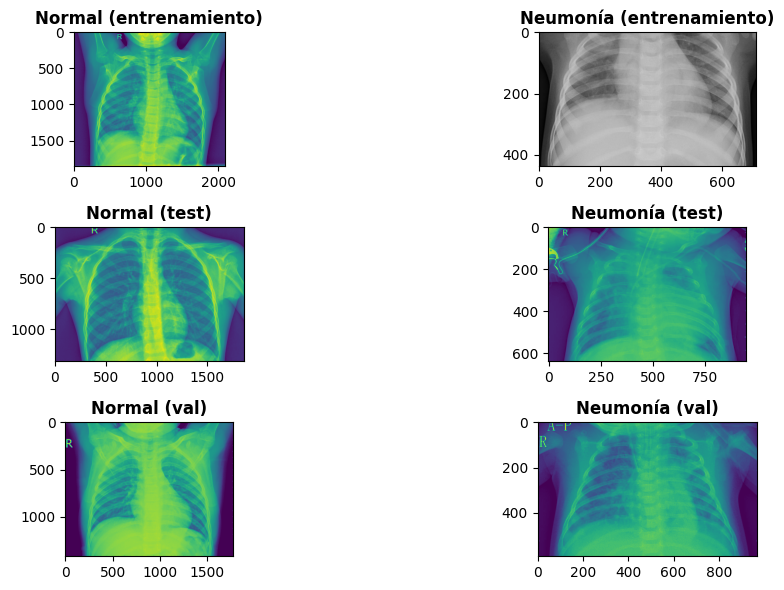

In [ ]:
# Libreria necesaria
import matplotlib.pyplot as plt

# Configuración dimensión ddel grafico
plt.figure(figsize=(12, 6))

# plt.subplot(numero filas, numero columnas, ubicacion)
plt.subplot(3, 2, 1)
plt.imshow(img_train_normal) # imagen a mostrar

# Personalizar el título con tipo de letra en negrita y tamaño 14
titulo_estilo = {'fontsize': 12, 'fontweight': 'bold'}
plt.title("Normal (entrenamiento)", fontdict=titulo_estilo) # Titulo de imagen
#plt.title("Normal (entrenamiento)")

# Ubicacion de imagen
plt.subplot(3, 2, 2)
plt.imshow(img_train_pneumonia) # imagen a mostrar
plt.title("Neumonía (entrenamiento)", fontdict=titulo_estilo) # Titulo de imagen y formato

# Ubicacion de imagen
plt.subplot(3, 2, 3)
plt.imshow(img_test_normal) # imagen a mostrar
plt.title("Normal (test)", fontdict=titulo_estilo) # Titulo de imagen y formato

# Ubicacion de imagen
plt.subplot(3, 2, 4)
plt.imshow(img_test_pneumonia) # imagen a mostrar
plt.title("Neumonía (test)", fontdict=titulo_estilo) # Titulo de imagen y formato

# Ubicacion de imagen
plt.subplot(3, 2, 5)
plt.imshow(img_val_normal) # imagen a mostrar
plt.title("Normal (val)", fontdict=titulo_estilo) # Titulo de imagen y formato

# Ubicacion de imagen
plt.subplot(3, 2, 6)
plt.imshow(img_val_pneumonia) # imagen a mostrar
plt.title("Neumonía (val)", fontdict=titulo_estilo) # Titulo de imagen y formato

plt.tight_layout()  # Ajustar automáticamente la disposición

# Mostramos las imagenes
plt.show()

In [ ]:
# evita que esta salida (la instalacion de tensorflow) se muestre directamente en el cuaderno.

# instalacion de pip
%%capture
!pip install --upgrade pip

# instalacion de tensorflow
%%capture
!pip install tensorflow



**Explicación:**

Este código se encarga de configurar y crear generadores de datos utilizando **ImageDataGenerator** para la normalización de píxeles y la generación de lotes de imágenes desde directorios específicos para entrenamiento, validación y prueba.

**La normalización (rescale=1./255)** Cada valor de píxel se divide por 255, lo que coloca los valores resultantes en el rango [0, 1]. Este rango es comúnmente utilizado en el preprocesamiento de imágenes para asegurar que los valores sean manejables para los modelos de aprendizaje profundo (el valor máximo de un píxel en una imagen de 8 bits).

La función **flow_from_directory** se utiliza para crear flujos de datos que alimentarán el modelo durante el entrenamiento y evaluación.

**train_generador** = **train_datagen.flow_from_directory()**: Inicia la configuración del generador de datos para el conjunto de entrenamiento.

**train_path**: Ruta de la carpeta que contiene las imágenes de entrenamiento.

**target_size**=**(150, 150)**: Especifica el tamaño al que se redimensionarán las imágenes durante la carga. Aquí se ha fijado en 150x150 píxeles.

**batch_size=batch_size**: Tamaño del lote utilizado durante el entrenamiento. Es la cantidad de imágenes que se procesarán antes de que el modelo actualice sus pesos.

**class_mode="binary**": Indica el tipo de problema que estás abordando. En este caso, es una clasificación binaria, por lo que se utiliza "binary". Si estuvieras trabajando en una clasificación con más de dos clases, podrías usar "categorical".







# **Normalización de datos**

In [ ]:
# Importamos la clase ImageDataGenerator de TensorFlow y Keras para la generación de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definimos generadores de datos para entrenamiento, validación y prueba
batch_size = 32

# Iniciamos los generadores de datos para normalizar los valores de píxeles en el rango [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255) # Inicia la configuración del generador de datos normalizado de entrenamiento
val_datagen = ImageDataGenerator(rescale=1./255)  # Inicia la configuración del generador de datos normalizado de validación
test_datagen = ImageDataGenerator(rescale=1./255) # Inicia la configuración del generador de datos normalizado de prueba

# Configuramos el generador de datos para el conjunto de entrenamiento
train_generador = train_datagen.flow_from_directory(
    train_path,                # Ruta de la carpeta de entrenamiento
    target_size=(150, 150),    # Tamaño al que se redimensionarán las imágenes
    batch_size=batch_size,     # Tamaño del lote utilizado durante el entrenamiento
    class_mode="binary"        # Tipo de problema, "binary" para clasificación binaria o "categorical" para más de dos clases
)

# Configuramos el generador de datos para el conjunto de validación
val_generador = val_datagen.flow_from_directory(
    val_path,                 # Ruta de la carpeta de validacion
    target_size=(150, 150),   # Tamaño al que se redimensionarán las imágenes
    batch_size=batch_size,    # Tamaño del lote utilizado durante la validacion
    class_mode="binary"       # Tipo de problema, "binary" para clasificación binaria o "categorical" para más de dos clases
)

# Configuramos el generador de datos para el conjunto de prueba
test_generador = test_datagen.flow_from_directory(
    test_path,                # Ruta de la carpeta de prueba
    target_size=(150, 150),   # Tamaño al que se redimensionarán las imágenes
    batch_size=batch_size,    # Tamaño del lote utilizado durante la prueba
    class_mode="binary"       # Tipo de problema, "binary" para clasificación binaria o "categorical" para más de dos clases
)


Found 5248 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# **Creamos nuestro modelo de red neuronal CNN**

CNN significa Convolutional Neural Network en inglés, que traducido al español sería "Red Neuronal Convolucional" o "Red Neuronal Convolucional Profunda".

**Capa de Convolución (Conv2D)**: Utiliza 32 filtros de 3x3 con función de activación ReLU. La forma de entrada es (150, 150, 3), lo que sugiere que las imágenes de entrada son de tamaño 150x150 píxeles y tienen tres canales de color (RGB).

**Capa de Agrupación Máxima (MaxPooling2D)**: Reduce la dimensionalidad de la imagen mediante agrupación máxima con una ventana de 2x2.

**Segunda Capa de Convolución (Conv2D)**: Utiliza 64 filtros de 3x3 con función de activación ReLU.

**Segunda Capa de Agrupación Máxima (MaxPooling2D)**: Otra capa de agrupación máxima con una ventana de 2x2.

**Capa de Aplanamiento (Flatten)**: Convierte la salida 2D de las capas convolucionales a un vector 1D para alimentar las capas completamente conectadas.

**Capa Completamente Conectada (Dense)**: Con 64 neuronas y función de activación ReLU.

**Capa de Salida (Dense)**: Con 1 neurona y función de activación sigmoide, utilizada para problemas de clasificación binaria.

In [ ]:
# Importación de las clases necesarias desde TensorFlow y Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Creación de un modelo secuencial
model_1 = Sequential([
    # Capa de convolución con 32 filtros de 3x3, función de activación ReLU, y forma de entrada (150, 150, 3)
    Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),

    # Capa de agrupación máxima con una ventana de 2x2
    MaxPooling2D((2, 2)),

    # Segunda capa de convolución con 64 filtros de 3x3 y función de activación ReLU
    Conv2D(64, (3, 3), activation="relu"),

    # Segunda capa de agrupación máxima con una ventana de 2x2
    MaxPooling2D((2, 2)),

    # Capa de aplanamiento para convertir la salida 2D a un vector 1D
    Flatten(),

    # Capa completamente conectada con 64 neuronas y función de activación ReLU
    Dense(64, activation="relu"),

    # Capa de salida con 1 neurona y función de activación sigmoide para clasificación binaria
    Dense(1, activation="sigmoid")
])

# Compilación del modelo con el optimizador Adam, función de pérdida entropía cruzada y métrica accuracy
model_1.compile(optimizer="adam",
                loss="binary_crossentropy",
                metrics=["accuracy"])


# **Entrenamiento de nuestro modelo 1**



In [ ]:
# Entrenamiento del modelo utilizando el generador de datos de entrenamiento y validación
epochs = 10

history_1 = model_1.fit(
    train_generador,                # Generador de datos de entrenamiento
    steps_per_epoch=len(train_generador),  # Número total de pasos por época, generalmente igual al número de lotes
    epochs=epochs,                   # Número de épocas de entrenamiento
    validation_data=val_generador,  # Generador de datos de validación
    validation_steps=len(val_generador)  # Número total de pasos de validación
)


Epoch 1/10
164/164 [==============================] - 602s 3s/step - loss: 0.3342 - accuracy: 0.8805 - val_loss: 0.5115 - val_accuracy: 0.7500
Epoch 2/10
164/164 [==============================] - 63s 386ms/step - loss: 0.0964 - accuracy: 0.9651 - val_loss: 0.1931 - val_accuracy: 0.8750
Epoch 3/10
164/164 [==============================] - 61s 373ms/step - loss: 0.0748 - accuracy: 0.9739 - val_loss: 0.0617 - val_accuracy: 1.0000
Epoch 4/10
164/164 [==============================] - 60s 367ms/step - loss: 0.0682 - accuracy: 0.9762 - val_loss: 0.1629 - val_accuracy: 0.8750
Epoch 5/10
164/164 [==============================] - 62s 377ms/step - loss: 0.0510 - accuracy: 0.9823 - val_loss: 0.1620 - val_accuracy: 0.9375
Epoch 6/10
164/164 [==============================] - 60s 365ms/step - loss: 0.0408 - accuracy: 0.9848 - val_loss: 0.1713 - val_accuracy: 0.8750
Epoch 7/10
164/164 [==============================] - 60s 366ms/step - loss: 0.0293 - accuracy: 0.9899 - val_loss: 0.1917 - val_accu

 Explicación del paso siguiente:

 model_1.save_weights: Método para guardar los pesos del modelo.

"model1_weights.h5": Nombre del archivo donde se guardarán los pesos. El formato h5 es comúnmente utilizado para almacenar estructuras de datos grandes en archivos.

In [ ]:
# Guardamos los pesos del modelo de clasificacion de rayos X de torax en un archivo, para ocuparlo mas adelante para ensamblar modelos
# Guardar los pesos entrenados del modelo en un archivo h5
model_1.save_weights("model1_weights.h5")


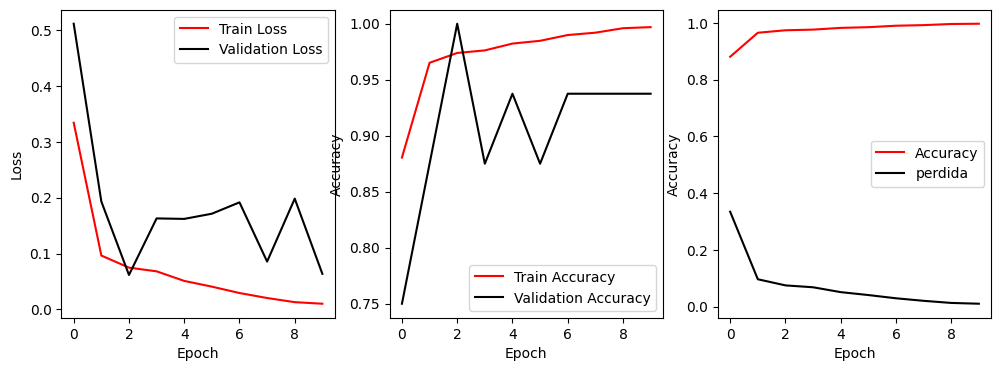

In [ ]:
# Grafica de la evolución de la pérdida y la precisión
# Dimensionamos el gráfico
plt.figure(figsize=(12, 4))
# Posiciones de los subplot
plt.subplot(1, 3, 1)
# perdida en datos de entramiento
plt.plot(history_1.history["loss"], label='Train Loss', color = "red")
# Perdida en conjunto de validacion de datos
plt.plot(history_1.history["val_loss"], label='Validation Loss', color = "black")
# Titulo ejes
#plt.title("Evolución de la pérdida datos entrenamiento y validacion", color= "black")
plt.xlabel('Epoch', color= "black")
plt.ylabel('Loss', color= "black")
# Ubicacion legenda
plt.legend()

# Posiciones de los subplot
plt.subplot(1, 3, 2)
# Presicion de datos de entrenamiento
plt.plot(history_1.history['accuracy'], label="Train Accuracy", color="red")
# Presicion de datos de conjunto validacion
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy', color="black")
# Titulo de ejes
plt.xlabel('Epoch', color= "black")
plt.ylabel('Accuracy', color= "black")
# Ubicacion de legenda
plt.legend()


# Posiciones de los subplot
plt.subplot(1, 3, 3)
# Presicion de datos de entrenamiento
plt.plot(history_1.history['accuracy'], label="Accuracy", color="red")
# Presicion de datos de conjunto validacion
plt.plot(history_1.history['loss'], label='perdida', color="black")
# Titulo de ejes
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# Ubicacion de legenda
plt.legend()


plt.show()

# **Predecimos unas muestras de datos (test) con nuestro modelo entrenado**

In [ ]:
# Ptredicciones con los datos de prueba

# Creamos una variable llamada num_predictions y asignándole el valor de 10
num_predictions = 10
# Se obtiene el siguiente lote de imágenes y etiquetas del generador de datos de prueba
test_imagenes, test_labels = next(test_generador)

In [ ]:
# hacemos predicciones utilizando un modelo previamente entrenado model_1
predictions = model_1.predict(test_imagenes)


1/1 [==============================] - 0s 296ms/step


In [ ]:
%%capture
!pip install scikit-learn

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# convertir las predicciones a etiquetas binarias (0 o 1)
binary_predictions = np.round(predictions)

# obtenemos la etiquetas reales
y_true = test_labels
y_pred = binary_predictions

In [ ]:
# Mostramos los valores
y_true

array([1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
      dtype=float32)

In [ ]:
y_pred

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
# =====================================

In [ ]:
# para poder utilizar Image.open()
%%capture
!pip install Pillow


In [ ]:
print(test_path)

/content/drive/MyDrive/Colab Notebooks/Proyecto/chest_xray/test


# **Reporte de nuestra predicciones obtenidas**

In [ ]:
from sklearn.metrics import classification_report
y_pred = binary_predictions

# Supongamos que y_true son las etiquetas verdaderas y y_pred son las predicciones del modelo
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.44      0.62         9
         1.0       0.82      1.00      0.90        23

    accuracy                           0.84        32
   macro avg       0.91      0.72      0.76        32
weighted avg       0.87      0.84      0.82        32



Resumen:

• El modelo tiene una precisión perfecta (1.00) para la clase 0.0, lo que significa que cuando predice que una observación pertenece a la clase 0.0, siempre acierta. Sin embargo, su recall (0.44) para la misma clase es bajo, lo que indica que solo es capaz de identificar correctamente el 44% de las observaciones reales de la clase 0.0.

•	Para la clase 1.0, el modelo tiene una precisión del 82% y un recall del 100%. Esto significa que cuando el modelo predice que una observación pertenece a la clase 1.0, acierta el 82% de las veces. Además, el modelo es capaz de identificar correctamente todas las observaciones reales de la clase 1.0.

•	El accuracy general del modelo es del 84%, lo que indica que el modelo acierta el 84% de las veces en general, independientemente de la clase.

•	El promedio ponderado (weighted avg) de la precisión es del 87% y el del recall es del 84%**, lo que sugiere que el modelo tiene un rendimiento generalmente bueno, pero podría mejorar, especialmente en la identificación de la clase 0.0.

# **Matriz de confusión**

In [ ]:
# Matriz de confusion
conf_matrix = confusion_matrix(y_true, binary_predictions)
print("Matriz de confusión:\n", conf_matrix)

Matriz de confusión:
 [[ 4  5]
 [ 0 23]]


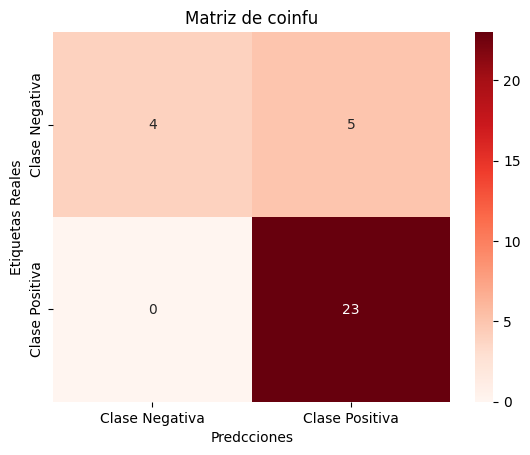

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# definir etiquetas para los ejes
labels = ["Clase Negativa", "Clase Positiva"]

# Crear la matriz de confusion
conf_matrix = confusion_matrix(y_true, binary_predictions)

# Crear mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

# Confg adicionales
plt.title("Matriz de coinfu")
plt.xlabel("Predcciones")
plt.ylabel("Etiquetas Reales")
plt.show()




Interpretación:

El modelo ha predicho correctamente 4 instancias como positivas y 23 instancias como negativas.

Hubo 5 falsos positivos, lo que significa que el modelo predijo incorrectamente 5 instancias como positivas cuando en realidad eran negativas.

No hubo falsos negativos, lo que implica que el modelo no clasificó incorrectamente ninguna instancia negativa como positiva.

En general, la matriz de confusión indica que el modelo tiene un buen rendimiento en la clasificación de ambas clases, con un pequeño número de errores (5 falsos positivos).

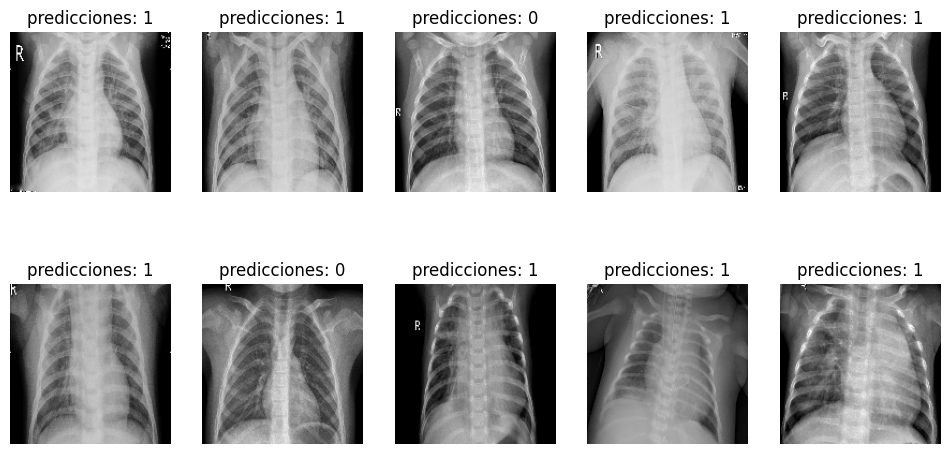

In [ ]:
# Imagenes con predicciones correspondientes donde 0 = Normal y 1 = Neumonia

plt.figure(figsize=(12, 6))
for i in range(num_predictions):
  plt.subplot(2, 5, i+1)
  # Mostrar la imagen
  plt.imshow(test_imagenes[i])

  # Titulo de nuestras imagenes
  plt.title(f"predicciones: {round(predictions[i][0])}")
  plt.axis("off")

# **Creación de nuestro modelo N2**

In [ ]:
# Modelo 2

# Importación de las clases necesarias desde TensorFlow y Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Creación de un modelo secuencial
model_2 = Sequential([
    # Capa de convolución con 32 filtros de 3x3, función de activación ReLU, y forma de entrada (150, 150, 3)
    Conv2D(64, (3, 3), activation="relu", input_shape=(150, 150, 3)),

    # Capa de agrupación máxima con una ventana de 2x2
    MaxPooling2D((2, 2)),

    # Segunda capa de convolución con 64 filtros de 3x3 y función de activación ReLU
    Conv2D(128, (3, 3), activation="relu"),

    # Segunda capa de agrupación máxima con una ventana de 2x2
    MaxPooling2D((2, 2)),

    # Capa de aplanamiento para convertir la salida 2D a un vector 1D
    Flatten(),

    # Capa completamente conectada con 64 neuronas y función de activación ReLU
    Dense(64, activation="relu"),

    # Capa de salida con 1 neurona y función de activación sigmoide para clasificación binaria
    Dense(1, activation="sigmoid")
])

# Compilación del modelo con el optimizador Adam, función de pérdida entropía cruzada y métrica accuracy
model_2.compile(optimizer="adam",
                loss="binary_crossentropy",
                metrics=["accuracy"])



# **Entrenamiento de nuestro modelo 2**

In [ ]:
# Entrenamiento del modelo
epochs = 10

history_2 = model_2.fit(
    train_generador,
    steps_per_epoch = len(train_generador),
    epochs= epochs,
    validation_data = val_generador,
    validation_steps = len(val_generador)
)

Epoch 1/10
164/164 [==============================] - 65s 372ms/step - loss: 0.3743 - accuracy: 0.8529 - val_loss: 0.5793 - val_accuracy: 0.6875
Epoch 2/10
164/164 [==============================] - 61s 374ms/step - loss: 0.0984 - accuracy: 0.9628 - val_loss: 0.2564 - val_accuracy: 0.9375
Epoch 3/10
164/164 [==============================] - 61s 373ms/step - loss: 0.0761 - accuracy: 0.9699 - val_loss: 0.2255 - val_accuracy: 0.9375
Epoch 4/10
164/164 [==============================] - 61s 369ms/step - loss: 0.0720 - accuracy: 0.9760 - val_loss: 0.4596 - val_accuracy: 0.8125
Epoch 5/10
164/164 [==============================] - 61s 372ms/step - loss: 0.0508 - accuracy: 0.9813 - val_loss: 0.0442 - val_accuracy: 1.0000
Epoch 6/10
164/164 [==============================] - 61s 369ms/step - loss: 0.0362 - accuracy: 0.9870 - val_loss: 0.1152 - val_accuracy: 1.0000
Epoch 7/10
164/164 [==============================] - 60s 368ms/step - loss: 0.0288 - accuracy: 0.9889 - val_loss: 0.0470 - val_ac

In [ ]:
# Guardamos los pesos del modelo de clasificacion de rayos X de torax en un archivo, para ocuparlo mas adelante para ensamblar modelos
model_2.save_weights("model2_weights.h5")

# **Gráficas de nuestros resultados**

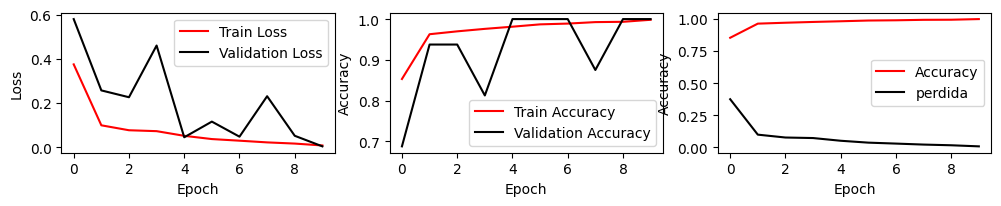

In [ ]:
# Grafica de la evolución de la pérdida y la precisión
# Dimensionamos el gráfico
plt.figure(figsize=(12, 4))
# Posiciones de los subplot
plt.subplot(2, 3, 1)
# perdida en datos de entramiento
plt.plot(history_2.history["loss"], label='Train Loss', color = "red")
# Perdida en conjunto de validacion de datos
plt.plot(history_2.history["val_loss"], label='Validation Loss', color = "black")
# Titulo ejes
#plt.title("Evolución de la pérdida datos entrenamiento y validacion", color= "black")
plt.xlabel('Epoch', color= "black")
plt.ylabel('Loss', color= "black")
# Ubicacion legenda
plt.legend()

# Posiciones de los subplot
plt.subplot(2, 3, 2)
# Presicion de datos de entrenamiento
plt.plot(history_2.history['accuracy'], label="Train Accuracy", color="red")
# Presicion de datos de conjunto validacion
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy', color="black")
# Titulo de ejes
plt.xlabel('Epoch', color= "black")
plt.ylabel('Accuracy', color= "black")
# Ubicacion de legenda
plt.legend()


# Posiciones de los subplot
plt.subplot(2, 3, 3)
# Presicion de datos de entrenamiento
plt.plot(history_2.history['accuracy'], label="Accuracy", color="red")
# Presicion de datos de conjunto validacion
plt.plot(history_2.history['loss'], label='perdida', color="black")
# Titulo de ejes
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# Ubicacion de legenda
plt.legend()


plt.show()

# **Predecimos unas muestras de datos (test) con nuestro modelo entrenado**


In [ ]:
# Predicciones con los datos de prueba
numero_predictions2 = 10
test_images, test_labels = next(test_generador)

# Predicciones
predictions2 = model_2.predict(test_images)

1/1 [==============================] - 0s 63ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# convertir las predicciones a etiquetas binarias (0 o 1)
binary_predictions2 = np.round(predictions2)

# obtenemos la etiquetas reales
y_true2 = test_labels
y_pred2 = binary_predictions2


# **Matriz de confusión**

In [ ]:
# Matriz de confusion
conf_matrix2 = confusion_matrix(y_true2, binary_predictions2)
print("Matriz de confusión:\n", conf_matrix2)

Matriz de confusión:
 [[ 4  6]
 [ 0 22]]


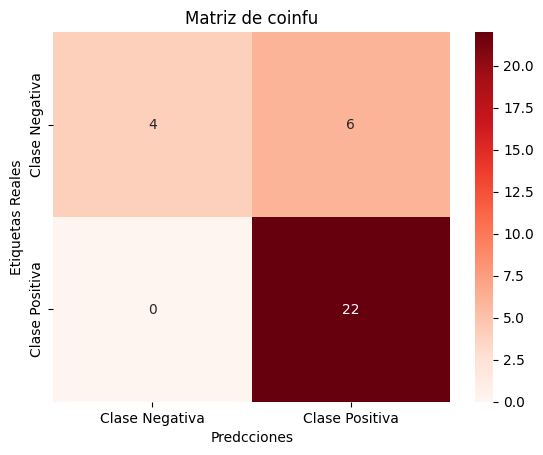

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# definir etiquetas para los ejes
labels = ["Clase Negativa", "Clase Positiva"]

# Crear la matriz de confusion
conf_matrix2 = confusion_matrix(y_true2, binary_predictions2)

# Crear mapa de calor
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

# Confg adicionales
plt.title("Matriz de coinfu")
plt.xlabel("Predcciones")
plt.ylabel("Etiquetas Reales")
plt.show()

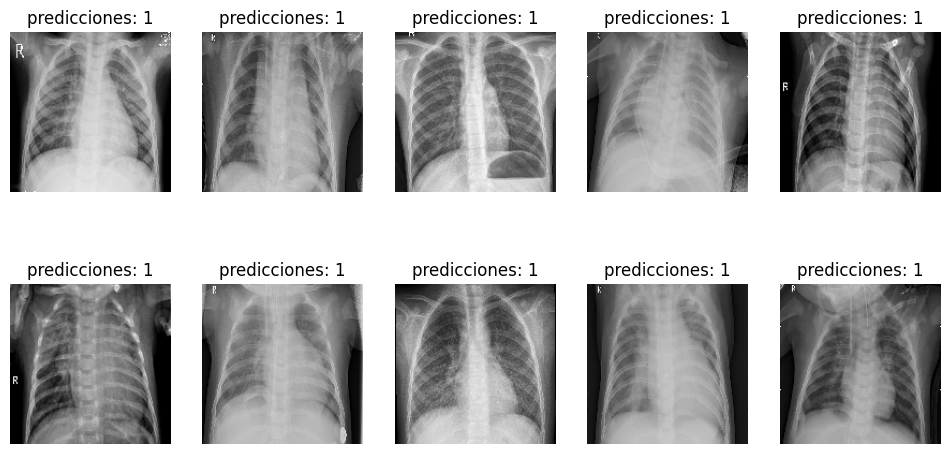

In [ ]:
# Imagenes con predicciones correspondientes

plt.figure(figsize=(12, 6))
for i in range(numero_predictions2):
  plt.subplot(2, 5, i+1)
  plt.imshow(test_images[i])
  plt.title(f"predicciones: {round(predictions2[i][0])}")
  plt.axis("off")

# **Reporte de nuestra predicciones obtenidas**

In [ ]:
from sklearn.metrics import classification_report
y_pred2 = binary_predictions2

# Supongamos que y_true son las etiquetas verdaderas y y_pred son las predicciones del modelo
print(classification_report(y_true2, y_pred2))

              precision    recall  f1-score   support

         0.0       1.00      0.40      0.57        10
         1.0       0.79      1.00      0.88        22

    accuracy                           0.81        32
   macro avg       0.89      0.70      0.73        32
weighted avg       0.85      0.81      0.78        32



# **Creación de nuestro modelo N3**

In [ ]:
# Modelo 3

# Importación de las clases necesarias desde TensorFlow y Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Creación de un modelo secuencial
model_3 = Sequential([
    # Capa de convolución con 32 filtros de 3x3, función de activación ReLU, y forma de entrada (150, 150, 3)
    Conv2D(128, (3, 3), activation="relu", input_shape=(150, 150, 3)),

    # Capa de agrupación máxima con una ventana de 2x2
    MaxPooling2D((2, 2)),

    # Segunda capa de convolución con 128 filtros de 3x3 y función de activación ReLU
    Conv2D(128, (3, 3), activation="relu"),

    # Segunda capa de agrupación máxima con una ventana de 2x2
    MaxPooling2D((2, 2)),

    # Capa de aplanamiento para convertir la salida 2D a un vector 1D
    Flatten(),

    # Capa completamente conectada con 128 neuronas y función de activación ReLU
    Dense(128, activation="relu"),

    # Capa de salida con 1 neurona y función de activación sigmoide para clasificación binaria
    Dense(1, activation="sigmoid")
])

# Compilación del modelo con el optimizador Adam, función de pérdida entropía cruzada y métrica accuracy
model_3.compile(optimizer="adam",
                loss="binary_crossentropy",
                metrics=["accuracy"])



# **Entrenamiento de nuestro modelo N3**

In [ ]:
# Entrenamiento del modelo 3
epochs = 10

history_3 = model_3.fit(
    train_generador,
    steps_per_epoch = len(train_generador),
    epochs= epochs,
    validation_data = val_generador,
    validation_steps = len(val_generador)
)

Epoch 1/10
164/164 [==============================] - 66s 373ms/step - loss: 0.3491 - accuracy: 0.8841 - val_loss: 0.2520 - val_accuracy: 0.8750
Epoch 2/10
164/164 [==============================] - 62s 376ms/step - loss: 0.0990 - accuracy: 0.9680 - val_loss: 0.7639 - val_accuracy: 0.7500
Epoch 3/10
164/164 [==============================] - 62s 379ms/step - loss: 0.0918 - accuracy: 0.9661 - val_loss: 0.1843 - val_accuracy: 0.8750
Epoch 4/10
164/164 [==============================] - 63s 382ms/step - loss: 0.0709 - accuracy: 0.9750 - val_loss: 0.2139 - val_accuracy: 0.8750
Epoch 5/10
164/164 [==============================] - 63s 381ms/step - loss: 0.0538 - accuracy: 0.9811 - val_loss: 0.2283 - val_accuracy: 0.8750
Epoch 6/10
164/164 [==============================] - 65s 393ms/step - loss: 0.0378 - accuracy: 0.9876 - val_loss: 0.1484 - val_accuracy: 0.8750
Epoch 7/10
164/164 [==============================] - 63s 384ms/step - loss: 0.0307 - accuracy: 0.9886 - val_loss: 0.2272 - val_ac

In [ ]:
# Guardamos los pesos del modelo de clasificacion de rayos X de torax en un archivo, para ocuparlo mas adelante para ensamblar modelos
model_3.save_weights("model3_weights.h5")

# **Gráficas de nuestros resultados**

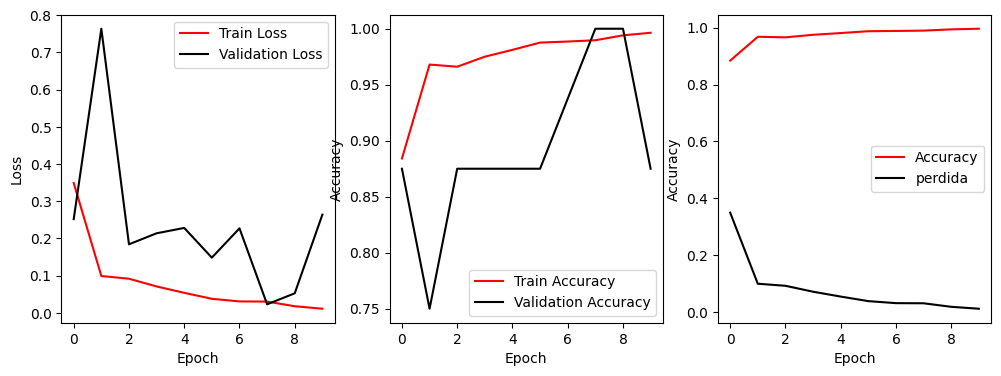

In [ ]:
# Grafica de la evolución de la pérdida y la precisión
# Dimensionamos el gráfico
plt.figure(figsize=(12, 4))
# Posiciones de los subplot
plt.subplot(1, 3, 1)
# perdida en datos de entramiento
plt.plot(history_3.history["loss"], label='Train Loss', color = "red")
# Perdida en conjunto de validacion de datos
plt.plot(history_3.history["val_loss"], label='Validation Loss', color = "black")
# Titulo ejes
#plt.title("Evolución de la pérdida datos entrenamiento y validacion", color= "black")
plt.xlabel('Epoch', color= "black")
plt.ylabel('Loss', color= "black")
# Ubicacion legenda
plt.legend()

# Posiciones de los subplot
plt.subplot(1, 3, 2)
# Presicion de datos de entrenamiento
plt.plot(history_3.history['accuracy'], label="Train Accuracy", color="red")
# Presicion de datos de conjunto validacion
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy', color="black")
# Titulo de ejes
plt.xlabel('Epoch', color= "black")
plt.ylabel('Accuracy', color= "black")
# Ubicacion de legenda
plt.legend()


# Posiciones de los subplot
plt.subplot(1, 3, 3)
# Presicion de datos de entrenamiento
plt.plot(history_3.history['accuracy'], label="Accuracy", color="red")
# Presicion de datos de conjunto validacion
plt.plot(history_3.history['loss'], label='perdida', color="black")
# Titulo de ejes
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# Ubicacion de legenda
plt.legend()


plt.show()

# **Predecimos unas muestras de datos (test) con nuestro modelo 3 entrenado**

In [ ]:
# Predicciones con los datos de prueba
numero_predictions3 = 10
test_images, test_labels = next(test_generador)

# Predicciones
predictions3 = model_3.predict(test_images)



1/1 [==============================] - 0s 60ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# convertir las predicciones a etiquetas binarias (0 o 1)
binary_predictions3 = np.round(predictions3)

# obtenemos la etiquetas reales
y_true3 = test_labels

y_pred3 = binary_predictions3

# **Matriz de confusión**

In [ ]:
# Matriz de confusion
conf_matrix3 = confusion_matrix(y_true3, binary_predictions3)
print("Matriz de confusión:\n", conf_matrix3)



Matriz de confusión:
 [[ 2  8]
 [ 0 22]]


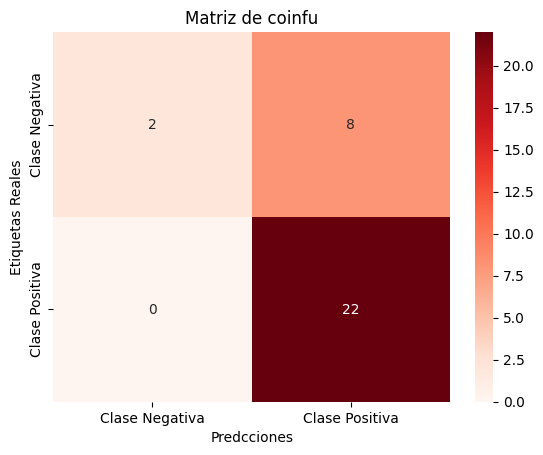

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# definir etiquetas para los ejes
labels = ["Clase Negativa", "Clase Positiva"]

# Crear la matriz de confusion
conf_matrix3 = confusion_matrix(y_true3, binary_predictions3)

# Crear mapa de calor
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

# Confg adicionales
plt.title("Matriz de coinfu")
plt.xlabel("Predcciones")
plt.ylabel("Etiquetas Reales")
plt.show()

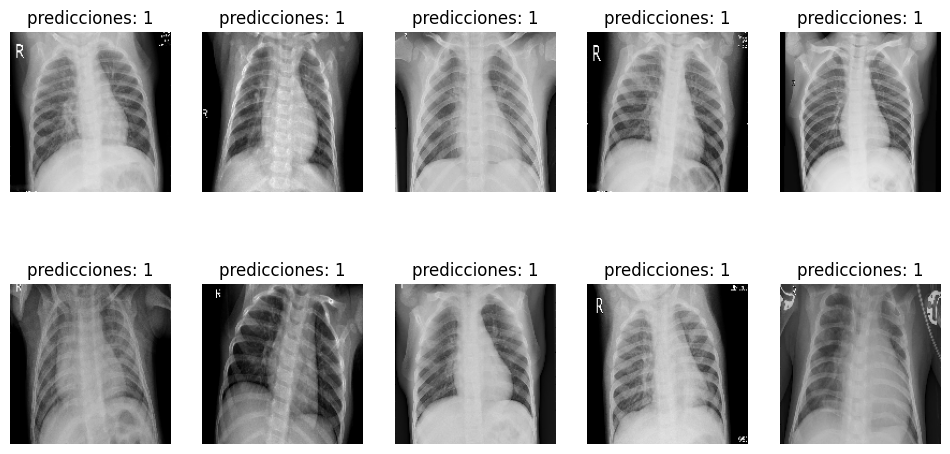

In [ ]:
# Imagenes con predicciones correspondientes

plt.figure(figsize=(12, 6))
for i in range(numero_predictions3):
  plt.subplot(2, 5, i+1)
  plt.imshow(test_images[i])
  plt.title(f"predicciones: {round(predictions3[i][0])}")
  plt.axis("off")

In [ ]:
# Calcula la precision
accuracy3 = accuracy_score(y_true3, binary_predictions3)
print("Accuracy:", accuracy3)

# Calcular la predision
precision3 = precision_score(y_true3, binary_predictions3)
print("Precision:", precision3)

# Caluclarmos el recall
recall3 = recall_score(y_true3, binary_predictions3)
print("recall", recall3)

# Caluclarmos el f1-score
f13= f1_score(y_true3, binary_predictions3)
print("F1 Score", f13)

Accuracy: 0.75
Precision: 0.7333333333333333
recall 1.0
F1 Score 0.846153846153846


In [ ]:
# Supongamos que y_true son las etiquetas verdaderas y y_pred son las predicciones del modelo
print(classification_report(y_true3, binary_predictions3))

              precision    recall  f1-score   support

         0.0       1.00      0.20      0.33        10
         1.0       0.73      1.00      0.85        22

    accuracy                           0.75        32
   macro avg       0.87      0.60      0.59        32
weighted avg       0.82      0.75      0.69        32



# **Hyperparametros (Tuning)**

Creamos nuestro modelo CNN Convolucional a ocupar en tunnig

In [ ]:

# Importación de las clases necesarias desde TensorFlow y Keras
from tensorflow.keras.models import Sequential, load_model
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


# cargar datos

model_1 = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])
model_1.save_weights("model1_weights.h5")

model_2 = Sequential([
    Conv2D(64, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])
model_2.save_weights("model2_weights.h5")

model_3 = Sequential([
    Conv2D(128, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])
model_3.save_weights("model3_weights.h5")



In [ ]:
%%capture
!pip install keras-tuner

In [ ]:
%%capture
!pip install tensorflow-keras


# **Normalizamos los datos a ocupar en tuning**

In [ ]:
# Importamos la clase ImageDataGenerator de TensorFlow y Keras para la generación de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definimos generadores de datos para entrenamiento, validación y prueba
batch_size = 32

# Configuramos generadores de datos para normalizar los valores de píxeles en el rango [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Configuramos el generador de datos para el conjunto de entrenamiento
train_generador = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode="binary"  # O "categorical" si hay más de dos clases
)

# Configuramos el generador de datos para el conjunto de validación
val_generador = val_datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode="binary"  # O "categorical" si hay más de dos clases
)


Found 5248 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
%%capture
pip install kerastuner


# **Optimización de hiperparámetros**


*   Creamos nuestro modelo a ocupar para sintonizar
*   Configuramos nuestro sintonizador



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

def create_model(hp):
    model = Sequential([
        Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=32),
                (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Configurar el sintonizador RandomSearch
tuner = RandomSearch(
    create_model,                 # Función que crea el modelo a sintonizar
    objective='val_accuracy',     # Métrica objetivo para optimizar durante la búsqueda
    max_trials=5,                 # Número máximo de combinaciones de hiperparámetros a probar
    directory='my_dir',           # Directorio para almacenar los resultados del sintonizador
    project_name='radiografias'   # Nombre del proyecto
)




*   Buscamos hiperparámetros






In [ ]:
# Buscamos automáticamente la mejor combinación de hiperparámetros para un modelo dado.
tuner.search(train_generador,
             epochs=10,
             validation_data=val_generador,
             steps_per_epoch=len(train_generador),
             validation_steps=len(val_generador))

Trial 5 Complete [00h 10m 40s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 59m 50s


In [ ]:
# Obtener el mejor hiperparámetros
best_hps = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters



*   Construimos nuestro mejor modelo con los hiperparametros encontrados.
*   Compilamos el modelo



In [ ]:
# Construye el modelo con los mejores hiperparámetros
models = tuner.hypermodel.build(best_hps)

In [ ]:
# Función para predecir utilizando los modelos individuales
def ensemble_predict(models, X):
    predictions = [model.predict(X) for model in models]
    return sum(predictions) / len(models)

In [ ]:
#Compilar el modelo
models = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

models.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



*   Normalizamos los datos



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Directorio que contiene las imágenes de prueba
#test_data_dir = 'D:\Data Science\Modulo 7\Proyecto 7\chest_xray/test'
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/Proyecto/chest_xray/test'

# Crear un generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generador = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # importante para que las predicciones coincidan con las etiquetas reales
)

Found 624 images belonging to 2 classes.


In [ ]:
# Obtener imágenes y etiquetas de prueba
X_test, test_images = [], []



*   Realizamos predicciones de datos



In [ ]:
# Hacer predicciones usando los modelos individuales
predictions = model_1.predict(test_generador)
predictions2 = model_2.predict(test_generador)
predictions3 = model_3.predict(test_generador)

20/20 [==============================] - 6s 274ms/step


In [ ]:
# Combinar predicciones (por ejemplo, promedio)
ensemble_predictions = (predictions + predictions2 + predictions3) / 3

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Obtener las etiquetas reales del generador de prueba
y_true = test_generador.classes

In [ ]:
# Convertir las predicciones a clases binarias (0 o 1) si es necesario
ensemble_classes = (ensemble_predictions > 0.5).astype(int)

In [ ]:
# Calcular métricas
# Supongamos que y_true son las etiquetas verdaderas y ensemble_classes son las predicciones del modelo
print(classification_report(y_true, ensemble_classes))

              precision    recall  f1-score   support

           0       0.36      0.40      0.38       234
           1       0.61      0.56      0.59       390

    accuracy                           0.50       624
   macro avg       0.48      0.48      0.48       624
weighted avg       0.52      0.50      0.51       624



Explicación:

•	El modelo tiene una precisión del 36% para la clase 0, lo que significa que cuando predice que una observación pertenece a la clase 0, acierta el 36% de las veces. Su recall (40%) para la misma clase indica que es capaz de identificar correctamente el 40% de las observaciones reales de la clase 0.

•	Para la clase 1, el modelo tiene una precisión del 61% y un recall del 56%. Esto significa que cuando el modelo predice que una observación pertenece a la clase 1, acierta el 61% de las veces. Además, el modelo es capaz de identificar correctamente el 56% de las observaciones reales de la clase 1.

•	El accuracy general del modelo es del 50%, lo que indica que el modelo acierta el 50% de las veces en general, independientemente de la clase.

•	El promedio ponderado (weighted avg) de la precisión es del 52% y el del recall es del 50%**, lo que sugiere que el modelo tiene un rendimiento generalmente equilibrado, pero podría mejorar.



In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_true, ensemble_classes)
print("Matriz de Confusión del modelo ensamblado:")
print(conf_matrix)

Matriz de Confusión del modelo ensamblado:
[[ 94 140]
 [170 220]]


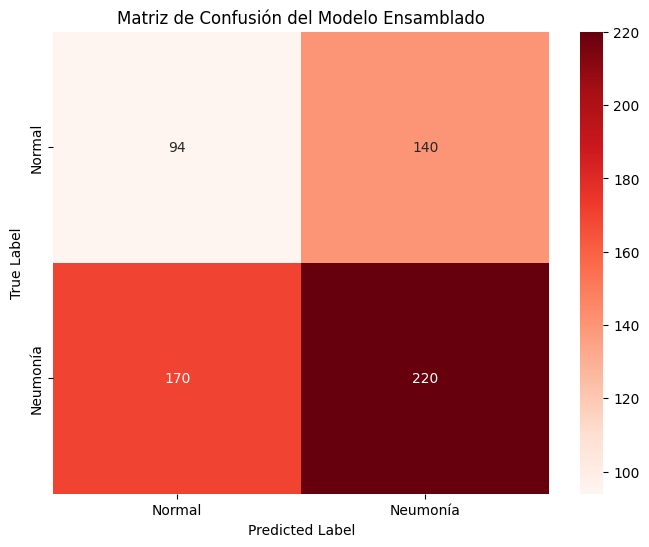

In [ ]:
# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Normal', 'Neumonía'], yticklabels=['Normal', 'Neumonía'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión del Modelo Ensamblado')
plt.show()

Interpretación:

El modelo ensamblado ha predicho correctamente 94 instancias como positivas y 220 instancias como negativas.

Hubo 140 falsos positivos, lo que significa que el modelo predijo incorrectamente 140 instancias como positivas cuando en realidad eran negativas.

Hubo 170 falsos negativos, lo que implica que el modelo predijo incorrectamente 170 instancias como negativas cuando en realidad eran positivas.

En general, la matriz de confusión indica que el modelo ensamblado tiene ciertas dificultades en la clasificación de ambas clases, con un número significativo de falsos positivos y falsos negativos.

**CONCLUSIÓN FINAL:**

En términos generales, el desempeño del modelo compuesto no es el esperado. Su rendimiento es más equilibrado entre las clases. Aun que puede clasificar imágenes este comete errores, tanto en las normales, como en las que presentan neumonía.
No obstante, existen ciertos aspectos en los que el modelo podría perfeccionarse. Para optimizar su desempeño, se podrían implementar las siguientes modificaciones:
- Se podría ampliar el conjunto de datos con el que se entrena el modelo compuesto. Esto permitiría al modelo aprender a clasificar imágenes de manera más precisa y consistente.
- Se podría modificar la configuración del modelo compuesto. Por ejemplo, se podría ajustar el umbral de clasificación para incrementar la precisión en nuestra matriz de confusión o la sensibilidad de nuestro accuracy.

**opcion 1 API **

In [ ]:
#import joblib
import pickle

In [ ]:
# Guardar el modelo en formato .pkl
#joblib.dump(ensemble_predictions, 'modelo_ensamblado.pkl')

with open('modelo_ensamblado.pkl', 'wb') as file:
    pickle.dump(ensemble_predictions, file)

In [ ]:
# Guardar el modelo ensamblado en formato .h5
models.save('modelo_ensamblado.h5')

In [ ]:
# Guardar el modelo en formato nativo de Keras
models.save('modelo_ensamblado.keras')

**opcion 2 API **

In [ ]:
from flask import Flask, request, jsonify
# Implementar la API REST con Flask
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    input_data = pd.DataFrame(df, index=[0])
    input_data = pd.get_dummies(input_data)
    prediction = best_rf_model.predict(input_data)[0]
    return jsonify({'prediction': int(prediction)})

if __name__ == '__main__':
    app.run(debug=True)